**Doug Marcum  
DSC 540 - Term Project Milestone 5** 

### Merging the Data and Storing in a Database/Visualizing Data

Now that you have cleaned and transformed your 3 datasets, you need to merge them together and load the data into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options).  

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source.  

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.  

Submit your code, visualizations, and a 250-500-word summary of what you learned and had to do to complete the project.

### 1. Continued Data Wrangling/Cleaning

In [1]:
# load libraries
import pandas as pd
import numpy as np
import json
import sqlite3
from sqlalchemy import create_engine

In [2]:
# load csv and pickle files
print('File shapes are as follows:')

# Milestone 2 File
neigh_demo = pd.read_csv('neighborhood_demo.csv')
print('neigh_demo has a shape of:', neigh_demo.shape)

# Milestone 3 File
divisions = pd.read_pickle('divisions.pkl')
print('divisions has a shape of:', divisions.shape)

# Milestone 4 File
crime_demo = pd.read_csv('crimes_demo.csv')
print('crime_demo has a shape of:', crime_demo.shape)

File shapes are as follows:
neigh_demo has a shape of: (978, 144)
divisions has a shape of: (1, 17)
crime_demo has a shape of: (25, 144)


In [3]:
# concat neigh and crime
df_1 = pd.concat([neigh_demo, crime_demo], ignore_index = True, sort = False)
print('df_1 shape:', df_1.shape)
df_1.head()

df_1 shape: (1003, 144)


,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
0,Neighbourhood Information,Neighbourhood Information,Neighbourhood Number,10000.0,129.0,128.0,20.0,95.0,42.0,34.0,...,37.0,7.0,137.0,64.0,60.0,94.0,100.0,97.0,27.0,31.0
1,Population,Population and dwellings,"Population, 2016",2731571.0,29113.0,23757.0,12054.0,30526.0,27695.0,15873.0,...,16936.0,22156.0,53485.0,12541.0,7865.0,14349.0,11817.0,12528.0,27593.0,14804.0
2,Population,Population and dwellings,"Population, 2011",2615060.0,30279.0,21988.0,11904.0,29177.0,26918.0,15434.0,...,15004.0,21343.0,53350.0,11703.0,7826.0,13986.0,10578.0,11652.0,27713.0,14687.0
3,Population,Population and dwellings,Total private dwellings,1179057.0,9371.0,8535.0,4732.0,18109.0,12473.0,6418.0,...,8054.0,8721.0,19098.0,5620.0,3604.0,6185.0,6103.0,7475.0,11051.0,5847.0
4,Population,Population and dwellings,Private dwellings occupied by usual residents,1112929.0,9120.0,8136.0,4616.0,15934.0,12124.0,6089.0,...,7549.0,8509.0,18436.0,5454.0,3449.0,5887.0,5676.0,7012.0,10170.0,5344.0


In [4]:
# examine divisions, reset index
divisions = divisions.reset_index()
divisions = divisions.drop('index', axis=1)
divisions

divisions,division_11,division_12,division_13,division_14,division_22,division_23,division_31,division_32,division_33,division_41,division_42,division_43,division_51,division_52,division_53,division_54,division_55
0,"[rockcliffe-smythe, dovercourt-wallace_emerson...","[keelesdale-eglinton_west, brookhaven-amesbury...","[yorkdale-glen_park, forest_hill_north, humewo...","[annex, trinity-bellwoods, niagara, south_park...","[islington-city_centre_west, princess-rosethor...","[thistletown-beaumond_heights, kingsview_villa...","[pelmo_park-humberlea, glenfield-jane_heights,...","[york_university_heights, downsview-roding-cfb...","[don_valley_village, banbury-don_mills, parkwo...","[birchcliffe-cliffside, dorset_park, oakridge,...","[rouge, tam_o'shanter-sullivan, steeles, aginc...","[west_hill, eglinton_east, woburn, cliffcrest,...","[church-yonge_corridor, cabbagetown-south_st_j...","[kensington-chinatown, university, waterfront_...","[thorncliffe_park, annex, bedford_park-nortown...","[victoria_village, old_east_york, taylor-masse...","[south_riverdale, woodbine_corridor, blake-jon..."


In [5]:
# outer join df_1 and divisions
data = pd.concat([df_1, divisions], axis=1, join='outer')
data.head()

,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,...,division_32,division_33,division_41,division_42,division_43,division_51,division_52,division_53,division_54,division_55
0,Neighbourhood Information,Neighbourhood Information,Neighbourhood Number,10000.0,129.0,128.0,20.0,95.0,42.0,34.0,...,"[york_university_heights, downsview-roding-cfb...","[don_valley_village, banbury-don_mills, parkwo...","[birchcliffe-cliffside, dorset_park, oakridge,...","[rouge, tam_o'shanter-sullivan, steeles, aginc...","[west_hill, eglinton_east, woburn, cliffcrest,...","[church-yonge_corridor, cabbagetown-south_st_j...","[kensington-chinatown, university, waterfront_...","[thorncliffe_park, annex, bedford_park-nortown...","[victoria_village, old_east_york, taylor-masse...","[south_riverdale, woodbine_corridor, blake-jon..."
1,Population,Population and dwellings,"Population, 2016",2731571.0,29113.0,23757.0,12054.0,30526.0,27695.0,15873.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Population,Population and dwellings,"Population, 2011",2615060.0,30279.0,21988.0,11904.0,29177.0,26918.0,15434.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Population,Population and dwellings,Total private dwellings,1179057.0,9371.0,8535.0,4732.0,18109.0,12473.0,6418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population,Population and dwellings,Private dwellings occupied by usual residents,1112929.0,9120.0,8136.0,4616.0,15934.0,12124.0,6089.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# make a copy of the data frame, drop first row as it is a mix of data
c_df = data.copy()
c_df = c_df.drop(0)
c_df.head()

,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,...,division_32,division_33,division_41,division_42,division_43,division_51,division_52,division_53,division_54,division_55
1,Population,Population and dwellings,"Population, 2016",2731571.0,29113.0,23757.0,12054.0,30526.0,27695.0,15873.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Population,Population and dwellings,"Population, 2011",2615060.0,30279.0,21988.0,11904.0,29177.0,26918.0,15434.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Population,Population and dwellings,Total private dwellings,1179057.0,9371.0,8535.0,4732.0,18109.0,12473.0,6418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population,Population and dwellings,Private dwellings occupied by usual residents,1112929.0,9120.0,8136.0,4616.0,15934.0,12124.0,6089.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Population,Population and dwellings,Population density per square kilometre,4334.0,3929.0,3034.0,2435.0,10863.0,2775.0,3377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# fill all of the divisions with combined data from the neighborhoods
c_df['division_11'] = c_df[divisions.division_11[0]].sum(axis=1)
c_df['division_12'] = c_df[divisions.division_12[0]].sum(axis=1)
c_df['division_13'] = c_df[divisions.division_13[0]].sum(axis=1)
c_df['division_14'] = c_df[divisions.division_14[0]].sum(axis=1)
c_df['division_22'] = c_df[divisions.division_22[0]].sum(axis=1)
c_df['division_23'] = c_df[divisions.division_23[0]].sum(axis=1)
c_df['division_31'] = c_df[divisions.division_31[0]].sum(axis=1)
c_df['division_32'] = c_df[divisions.division_32[0]].sum(axis=1)
c_df['division_33'] = c_df[divisions.division_33[0]].sum(axis=1)
c_df['division_41'] = c_df[divisions.division_41[0]].sum(axis=1)
c_df['division_42'] = c_df[divisions.division_42[0]].sum(axis=1)
c_df['division_43'] = c_df[divisions.division_43[0]].sum(axis=1)
c_df['division_51'] = c_df[divisions.division_51[0]].sum(axis=1)
c_df['division_52'] = c_df[divisions.division_52[0]].sum(axis=1)
c_df['division_53'] = c_df[divisions.division_53[0]].sum(axis=1)
c_df['division_54'] = c_df[divisions.division_54[0]].sum(axis=1)
c_df['division_55'] = c_df[divisions.division_55[0]].sum(axis=1)

In [8]:
# reset and drop old index (rename c_df - xyz_data)
tor_data = c_df.set_index('category')

# one last header change to make everything consistent
tor_data.columns = [x.replace('-', '_') for x in tor_data.columns]
tor_data.head()

,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south_malvern_west,alderwood,annex,banbury_don_mills,bathurst_manor,bay_street_corridor,...,division_32,division_33,division_41,division_42,division_43,division_51,division_52,division_53,division_54,division_55
category,,,,,,,,,,,,,,,,,,,,,
Population,Population and dwellings,"Population, 2016",2731571.0,29113.0,23757.0,12054.0,30526.0,27695.0,15873.0,25797.0,...,346823.0,199654.0,146804.0,265794.0,265996.0,186722.0,117262.0,236606.0,168095.0,117425.0
Population,Population and dwellings,"Population, 2011",2615060.0,30279.0,21988.0,11904.0,29177.0,26918.0,15434.0,19348.0,...,333196.0,191279.0,141653.0,267766.0,262419.0,153550.0,88986.0,228143.0,165859.0,113351.0
Population,Population and dwellings,Total private dwellings,1179057.0,9371.0,8535.0,4732.0,18109.0,12473.0,6418.0,18436.0,...,143374.0,80750.0,56406.0,87299.0,93299.0,116490.0,79216.0,113368.0,71860.0,52831.0
Population,Population and dwellings,Private dwellings occupied by usual residents,1112929.0,9120.0,8136.0,4616.0,15934.0,12124.0,6089.0,15074.0,...,134968.0,77585.0,54353.0,84671.0,90263.0,105023.0,67958.0,106265.0,69512.0,50321.0
Population,Population and dwellings,Population density per square kilometre,4334.0,3929.0,3034.0,2435.0,10863.0,2775.0,3377.0,14097.0,...,70062.0,39280.0,33512.0,32654.0,37787.0,119412.0,40241.0,99232.0,91225.0,48556.0


### 2. Database Creation

In [9]:
# database creation and connection
engine = create_engine('sqlite:///toronto_data.db', echo = True)
sqlite_connection = engine.connect()

2020-05-30 10:41:52,964 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-30 10:41:52,964 INFO sqlalchemy.engine.base.Engine ()
2020-05-30 10:41:52,964 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-30 10:41:52,964 INFO sqlalchemy.engine.base.Engine ()


In [10]:
# create table and save data to it
sqlite_table = "Toronto"
tor_data.to_sql(sqlite_table, sqlite_connection, if_exists='replace')

2020-05-30 10:41:53,148 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Toronto")
2020-05-30 10:41:53,148 INFO sqlalchemy.engine.base.Engine ()
2020-05-30 10:41:53,148 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Toronto")
2020-05-30 10:41:53,148 INFO sqlalchemy.engine.base.Engine ()
2020-05-30 10:41:53,164 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-05-30 10:41:53,164 INFO sqlalchemy.engine.base.Engine ()
2020-05-30 10:41:53,164 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Toronto")
2020-05-30 10:41:53,164 INFO sqlalchemy.engine.base.Engine ()
2020-05-30 10:41:53,197 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Toronto' AND type = 'table'
2020-05-30 10:41:53,197 INFO sqlalchemy.engine.base.Engine ()
2020-05-30 10:41:53,197 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list("Toront

2020-05-30 10:41:54,031 INFO sqlalchemy.engine.base.Engine (('Population', 'Population and dwellings', 'Population, 2016', 2731571.0, 29113.0, 23757.0, 12054.0, 30526.0, 27695.0, 15873.0, 25797.0, 21396.0, 13154.0, 23236.0, 6577.0, 29960.0, 22291.0, 21737.0, 7727.0, 14257.0, 9266.0, 11499.0, 17757.0, 11669.0, 9955.0, 10968.0, 13362.0, 31340.0, 26984.0, 16472.0, 15935.0, 14133.0, 9666.0, 17180.0, 27051.0, 25003.0, 36625.0, 35052.0, 11785.0, 21381.0, 15535.0, 22776.0, 9456.0, 22372.0, 18588.0, 11848.0, 21933.0, 12806.0, 10732.0, 30491.0, 14417.0, 9917.0, 15723.0, 22162.0, 23925.0, 12494.0, 16934.0, 10948.0, 12416.0, 15545.0, 14365.0, 13641.0, 43965.0, 14366.0, 11058.0, 17123.0, 17945.0, 22000.0, 9271.0, 7985.0, 43993.0, 16164.0, 14607.0, 15179.0, 16828.0, 15559.0, 10084.0, 43794.0, 10111.0, 10554.0, 26572.0, 33964.0, 17455.0, 20506.0, 13593.0, 32954.0, 16775.0, 29658.0, 11463.0, 16097.0, 23831.0, 31180.0, 11916.0, 18615.0, 13845.0, 21210.0, 18675.0, 9233.0, 13826.0, 34805.0, 10722.0, 780

2020-05-30 10:41:54,081 INFO sqlalchemy.engine.base.Engine COMMIT
2020-05-30 10:41:54,297 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-05-30 10:41:54,297 INFO sqlalchemy.engine.base.Engine ()


In [11]:
# close connection
sqlite_connection.close()

In [12]:
# examples of pulling data from the database
# example 1 - obtain the population of Toronto 2016
sqliteConnection = sqlite3.connect('toronto_data.db')
cursor = sqliteConnection.cursor()
sqlite_select_query = """SELECT city_of_toronto from Toronto where characteristic = 'Population, 2016'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
print("Toronto's population in 2016 was:", (int(records[0][0])))
print('')

# example 2 - obtain list off all neighborhood names
cursor.execute('PRAGMA TABLE_INFO({})'.format('Toronto'))
names = [tup[1] for tup in cursor.fetchall()]
neighs = (names[5:145])
print('Toronto Neighborhoods:')
print(neighs)

Toronto's population in 2016 was: 2731571

Toronto Neighborhoods:
['agincourt_south_malvern_west', 'alderwood', 'annex', 'banbury_don_mills', 'bathurst_manor', 'bay_street_corridor', 'bayview_village', 'bayview_woods_steeles', 'bedford_park_nortown', 'beechborough_greenbrook', 'bendale', 'birchcliffe_cliffside', 'black_creek', 'blake_jones', 'briar_hill_belgravia', 'bridle_path_sunnybrook_york_mills', 'broadview_north', 'brookhaven_amesbury', 'cabbagetown_south_st_james_town', 'caledonia_fairbank', 'casa_loma', 'centennial_scarborough', 'church_yonge_corridor', 'clairlea_birchmount', 'clanton_park', 'cliffcrest', 'corso_italia_davenport', 'danforth', 'danforth_east_york', 'don_valley_village', 'dorset_park', 'dovercourt_wallace_emerson_junction', 'downsview_roding_cfb', 'dufferin_grove', 'east_end_danforth', 'edenbridge_humber_valley', 'eglinton_east', 'elms_old_rexdale', 'englemount_lawrence', 'eringate_centennial_west_deane', 'etobicoke_west_mall', 'flemingdon_park', 'forest_hill_nor

The data is still not as structured as I would like it to be, as the initial files from the Canadian government, had categories within categories within the same field. With this, using the SQLite database is difficult to make proper select calls to pull data to create the visualizations. So, a data frame is pulled from the database, that is manipulated for the visualizations.

In [13]:
# use pandas to read in sql file
df = pd.read_sql('select * from Toronto', sqliteConnection)

# close connection
sqliteConnection.close()

# display
df.head()

,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south_malvern_west,alderwood,annex,banbury_don_mills,bathurst_manor,...,division_32,division_33,division_41,division_42,division_43,division_51,division_52,division_53,division_54,division_55
0,Population,Population and dwellings,"Population, 2016",2731571.0,29113.0,23757.0,12054.0,30526.0,27695.0,15873.0,...,346823.0,199654.0,146804.0,265794.0,265996.0,186722.0,117262.0,236606.0,168095.0,117425.0
1,Population,Population and dwellings,"Population, 2011",2615060.0,30279.0,21988.0,11904.0,29177.0,26918.0,15434.0,...,333196.0,191279.0,141653.0,267766.0,262419.0,153550.0,88986.0,228143.0,165859.0,113351.0
2,Population,Population and dwellings,Total private dwellings,1179057.0,9371.0,8535.0,4732.0,18109.0,12473.0,6418.0,...,143374.0,80750.0,56406.0,87299.0,93299.0,116490.0,79216.0,113368.0,71860.0,52831.0
3,Population,Population and dwellings,Private dwellings occupied by usual residents,1112929.0,9120.0,8136.0,4616.0,15934.0,12124.0,6089.0,...,134968.0,77585.0,54353.0,84671.0,90263.0,105023.0,67958.0,106265.0,69512.0,50321.0
4,Population,Population and dwellings,Population density per square kilometre,4334.0,3929.0,3034.0,2435.0,10863.0,2775.0,3377.0,...,70062.0,39280.0,33512.0,32654.0,37787.0,119412.0,40241.0,99232.0,91225.0,48556.0


### 3. Visualizations

In [14]:
# load libraries
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from geopy.geocoders import Nominatim
import urllib.request

# files for mapping visuals
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/9b74c019-4145-4a2c-a43c-47af51800b69?format=geojson&projection=4326'
filename = 'police_boundaries_data.geojson'
urllib.request.urlretrieve(url, filename)

url_2 = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/9b74c019-4145-4a2c-a43c-47af51800b69?format=csv&projection=4326'
filename = 'div_bound.csv'
urllib.request.urlretrieve(url_2, filename)

('div_bound.csv', <http.client.HTTPMessage at 0x22f45b6a0c8>)

### Visual 1 - Population change from 2011 to 2016 to 2019 by divisions

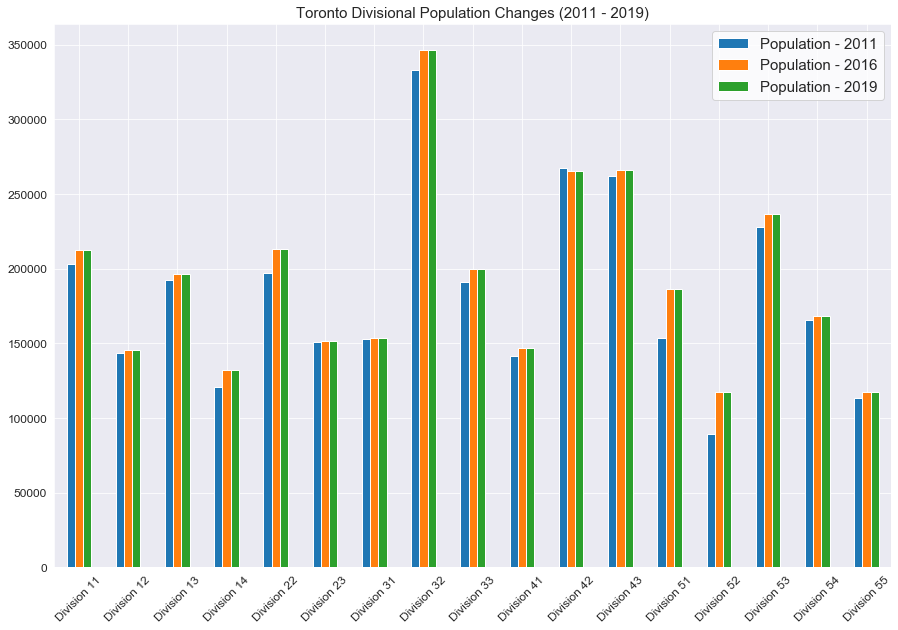

In [15]:
# var for quickly making division groups
divs = ['division_11','division_12', 'division_13','division_14','division_22','division_23', 'division_31',
        'division_32', 'division_33', 'division_41', 'division_42', 'division_43', 'division_51', 'division_52',
        'division_53', 'division_54', 'division_55']
cats = df[['category','topic','characteristic']]

# combine cats and divs
divisions_df = pd.concat([cats, df[divs]], axis=1, join='outer')

# change header for easier plotting/reading
divisions_df.columns = [x.replace('_', ' ') for x in divisions_df.columns]
divisions_df.columns = [x.title() for x in divisions_df.columns]

# population data frame and transformation
pop = pd.concat([divisions_df[977:978],divisions_df[0:2]], ignore_index = True, sort = False)
pop = pop.T
pop.columns = pop.iloc[2]
pop = pop.drop(pop.index[0:3])
pop.rename(columns={'population_2019': 'Population, 2019'}, inplace=True)

# plotting
sns.set_style("darkgrid")
ax = pop[['Population, 2011', 'Population, 2016', 'Population, 2019']].plot(kind = 'bar', figsize = (15, 10),
                                                                            fontsize = 12)
ax.set_title("Toronto Divisional Population Changes (2011 - 2019)", fontsize = 15)
plt.xticks(rotation = 45)
plt.legend(('Population - 2011', 'Population - 2016', 'Population - 2019'), fontsize = 15, facecolor='white')
plt.show()

### Visual 2 - Assualts by Divisions 2016 vs 2019

In [16]:
divisions_df.Category =='Crime'
crime_div = divisions_df[divisions_df.Category =='Crime']
pd.set_option('display.max_rows', crime_div.shape[0]+1)

assault = crime_div.loc[978:981].T
assault.columns = assault.iloc[2]
assault = assault.drop(assault.index[0:3])
assault = assault.drop(['assault_2017', 'assault_2018'], axis = 1)
assault = assault.reset_index()

# reorder it following the values of the first value:
ordered_df = assault.sort_values(by = 'assault_2016')
my_range = range(1, len(assault.index) + 1)

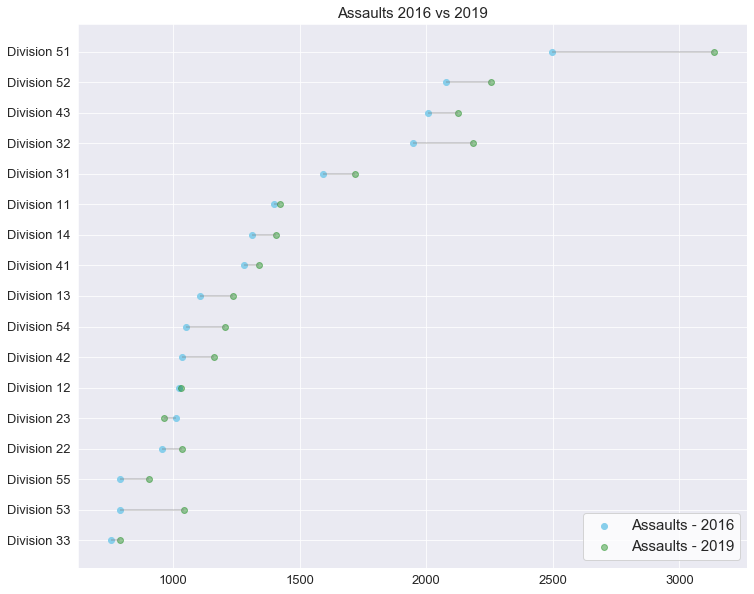

In [17]:
# vertical plot is made using the hline function
sns.set_style("darkgrid")
plt.figure(figsize = (12, 10))
plt.hlines(y = my_range, xmin = ordered_df['assault_2016'], xmax = ordered_df['assault_2019'],
           color = 'grey', alpha = 0.4)
plt.scatter(ordered_df['assault_2016'], my_range, color = 'skyblue', alpha = 1, label = 'Assaults - 2016')
plt.scatter(ordered_df['assault_2019'], my_range, color = 'green', alpha = 0.4 , label = 'Assaults - 2019')
plt.legend(loc = 'lower right', fontsize = 15, facecolor='white')
plt.yticks(my_range, ordered_df['index'], fontsize = 13)
plt.xticks(fontsize = 13)
plt.title("Assaults 2016 vs 2019", loc = 'center', fontsize = 15)
plt.show()

### Visual 3 - Crimes Committed in City of Toronto by Percentages

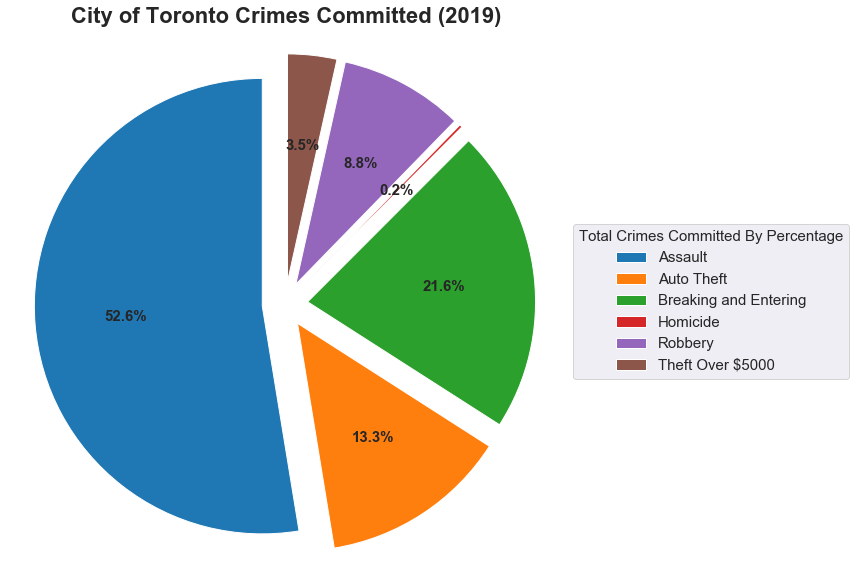

In [18]:
# grab data for city of Toronto proper
df_cot = df[['characteristic','city_of_toronto']]
df_cot = df_cot.iloc[[981, 985, 989, 993, 997, 1001]]
df_cot

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 15

# set variables
labels = ['Assault', 'Auto Theft', 'Breaking and Entering', 'Homicide', 'Robbery', 'Theft Over $5000']
sizes = df_cot['city_of_toronto']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# build pie chart and plot it
fig, ax = plt.subplots()

# use explode to pull out the larget slice of the pie, autopct to label slices with percentages
ax.pie(sizes, explode = explode, autopct = '%1.1f%%', startangle = 90, textprops={'weight': 'bold'})
ax.legend(labels, title = "Total Crimes Committed By Percentage",
          loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title('City of Toronto Crimes Committed (2019)', fontsize = 22, weight = 'bold')
ax.axis('equal')
plt.show()

### Visual 4 - Crime Rate Per 1000 Residents By Division Mapped (2019 data)

In [19]:
# create df omitting divisions 0 and 58 as they have no residential and are park areas
div_bound = pd.read_csv('div_bound.csv')
div_bound.sort_values(by=['AREA_NAME'], inplace = True)
div_bound = div_bound[div_bound.AREA_NAME != 0]
div_bound = div_bound[div_bound.AREA_NAME != 58]
div_bound = div_bound.reset_index()

# create df for crime per 1000 residents in each division
div_crimes = divisions_df.iloc[[977, 981, 985, 989, 993, 997, 1001]]
div_crimes = div_crimes.T
div_crimes.columns = div_crimes.iloc[2]
div_crimes = div_crimes.drop(div_crimes.index[0:3])
div_crimes = div_crimes.reset_index()
div_crimes['crime_rate_per_1000'] = div_crimes.iloc[:, -6:-1].sum(axis=1)*1000 / div_crimes['population_2019']
div_crimes['crime_rate_per_1000'] = div_crimes['crime_rate_per_1000'].astype(float)
div_crimes['crime_rate_per_1000'] = round(div_crimes['crime_rate_per_1000'], 2)
div_crimes['index'] = div_bound.AREA_NAME

In [20]:
# create map of Toronto
toronto_geo = r'police_boundaries_data.geojson'
address = 'Toronto'
geolocator = Nominatim(user_agent = "torcan_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_toronto = folium.Map(location = [latitude, longitude], zoom_start=10.45, tiles='Stamen Terrain')

# create a numpy array of length 5 and has linear spacing from the minium total score to the maximum total score
threshold_scale = np.linspace(div_crimes['crime_rate_per_1000'].min(),
                              div_crimes['crime_rate_per_1000'].max(), 
                              5, dtype=float)
# change the numpy array to a list
threshold_scale = threshold_scale.tolist() 
# make sure that the last value of the list is greater than the maximum score
threshold_scale[-1] = threshold_scale[-1] + 1

# let Folium determine the scale
map_toronto.choropleth(
    geo_data = toronto_geo,
    data = div_crimes,
    columns = ['index', 'crime_rate_per_1000'],
    key_on = 'feature.properties.AREA_NAME',
    threshold_scale = threshold_scale,
    fill_color = 'Reds', 
    fill_opacity = 0.8, 
    line_opacity = 0.5,
    legend_name = 'Toronto Divisional Crime Rates Per 1000 Residents (2019)',
    reset = True)

for lat, lng, division, crime_rate in zip(div_bound['LATITUDE'], div_bound['LONGITUDE'],
                                          div_bound['AREA_NAME'], div_crimes['crime_rate_per_1000']):
    label = f'Division: {division} | Crime Rate: {crime_rate}' 
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        popup = label,
        color = '#071521',
        fill = True,
        fill_color = 'black',
        fill_opacity = 0.75,
        parse_html = False).add_to(map_toronto)  
    
map_toronto

### Visual 5 - Income Distributions

In [21]:
# pull data from houseld income rangess 2015 to create new df
div_income_1 = divisions_df.loc[194:196]
div_income_2 = pd.DataFrame(divisions_df.loc[185]).T
div_income_3 = divisions_df.loc[197:208]
income = pd.concat([div_income_1, div_income_2, div_income_3], ignore_index = True, sort = False)
range = ['0 - 5,000','5,000 - 9,999','10,000 - 14,999','15,000 - 19,999','20,000 - 24,999','25,000 - 29,999',
         '30,000 - 34,999','35,000 - 39,999','40,000 - 44,999','45,000 - 49,999','50,000 - 59,999',
         '60,000 - 69,999','70,000 - 79,999','80,000 - 89,999','90,000 - 99,999','100,000 and over']
income['range'] = range
cols = list(income)
cols.insert(2, cols.pop(cols.index('range')))
income = income.loc[:, cols]
income.drop('Characteristic', axis = 1, inplace=True)
income = income.T
income.columns = income.iloc[2]
income = income.drop(income.index[0:3])
income = income.reset_index()

# add columns to show lower, middle and upper  household incomes
income['Lower Income Under $40K'] = round((income.iloc[:, 1:10].sum(axis = 1)/income.iloc[:, 1:17].sum(axis = 1)) * 100, 2)
income['Middle Income Under $80K'] = round((income.iloc[:, 10:15].sum(axis = 1)/income.iloc[:, 1:17].sum(axis = 1)) * 100, 2)
income['Upper Income Over $80K'] = round((income.iloc[:, 15:17].sum(axis = 1)/income.iloc[:, 1:17].sum(axis = 1)) * 100, 2)

# simplify the data more
income_class = income[['index','Lower Income Under $40K', 'Middle Income Under $80K', 'Upper Income Over $80K']] 
income_class = income_class.sort_values(by='Lower Income Under $40K')

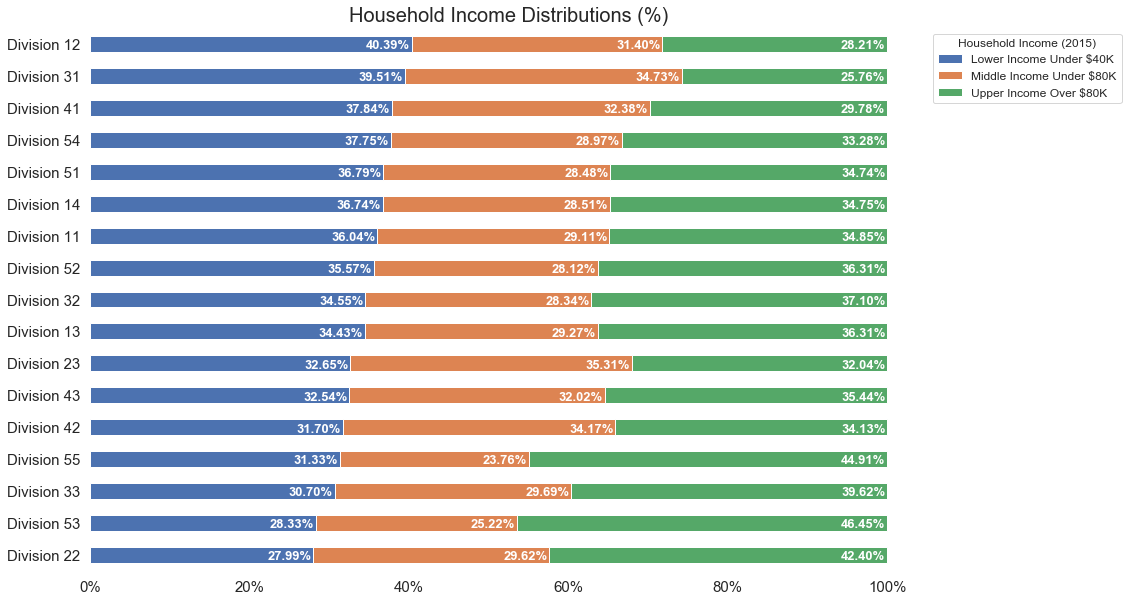

In [22]:
# start plotting
sns.set(style="white")

ax = income_class.plot(stacked=True, kind='barh', figsize=(15, 10), rot='horizontal')
# .patches is everything inside of the chart
for rect in ax.patches:
    # find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the data value and can used as the label
    # f'{width:.2f}' to format decimal values
    label_text = f'{width:.2f}%'  

    # ax.text(x, y, text)
    label_x = x + width - 3
    label_y = y + height / 2.5
    ax.text(label_x, label_y, label_text, ha = 'center', va = 'center', fontsize = 13, color = 'white', weight='bold')

ax.legend(fontsize = 12, title = "Household Income (2015)", bbox_to_anchor=(1, 0, 0.5, 1), loc='upper left')    
ax.set_title('Household Income Distributions (%)', fontsize = 20)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize = 15)
ax.set_yticklabels(income_class['index'], fontsize = 15)
ax.set_frame_on(False)
plt.show()

### 3. Summary

This project was one of the most, if not the most, enjoyable projects I have completed during my coursework at Bellevue. Before this, most of the data I worked with, in class and professionally, has been clean and delivered in way I could quickly start applying it. We have learned that clean cleaning, wrangling, and preparation can consume much of a data scientist day, and this project highlighted that for me.  

My assumption that data from a municipality would be clean was an assumption I should not have made. The data appeared to be structured well, until you started digging into it. There were search categories buried in the data fields, which made aligning everything confusing at first. While constructing my searches, I could not help but wonder how many had used this exact data, only to produce false results because of these small imperfections.  

When working with web scraping, I found this to be extremely interesting and equally frustrating. The data I chose to utilize was from a news publication. Once I began constructing my data frame from the scraping, I quickly realized how many typos there were in their reporting. The data was still helpful but required a lot of time spell checking and correcting ‘_’ and ‘-‘ issues. I am certain there is a more efficient way to correct everything I corrected, and I am eager to learn that moving forward.  

For the visualizations, I was reminded of how many ways you can produce the same visual but by following different paths. When I was uncertain on how to accomplish my visual, I would Google my question and skim over a few possible solutions. There were two instances where I changed the entire flow of my code, because I uncovered a much simpler way to accomplish the same feat.  This trial and error approach works wonders for strengthening my skills, as it forces me to evaluate so many solutions and options.  I truly start to follow and produce the code without having to think about it.  

Overall, this project was not one of pure task completion, but rather one of knowledge building. It was fun, impactful, and rewarding. 